Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

Loading dataset

In [8]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\GitHub\credit-scoring-model\data\train.csv")
df2 = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\GitHub\credit-scoring-model\data\test.csv")
df2.columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_8180\956846293.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\GitHub\credit-scoring-model\data\train.csv")


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [3]:
df.shape

(100000, 28)

Exploratory data analysis

In [3]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.00,100000.00,100000.00,100000.00,100000.00,98035.00,100000.00,100000.00
mean,4194.17,17.09,22.47,72.47,21.07,27.75,32.29,1403.12
std,3183.69,117.40,129.06,466.42,14.86,193.18,5.12,8306.04
min,303.65,-1.00,0.00,1.00,-5.00,0.00,20.00,0.00
25%,1625.57,3.00,4.00,8.00,10.00,3.00,28.05,30.31
50%,3093.75,6.00,5.00,13.00,18.00,6.00,32.31,69.25
75%,5957.45,7.00,7.00,20.00,28.00,9.00,36.50,161.22
max,15204.63,1798.00,1499.00,5797.00,67.00,2597.00,50.00,82331.00


In [9]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [10]:
numeric = df.select_dtypes (include =["int64", "float64"])
categorical = df.select_dtypes(include = "object")
numeric_columns = numeric.columns 
categoricaal_columns = categorical.columns
categoricaal_columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Data cleaning and preprocessing

In [ ]:
df[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Age", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]] = df[["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Age", "Amount_invested_monthly", "Monthly_Balance"]].apply(pd.to_numeric, errors="coerce")

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].median())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())


In [12]:
df["Type_of_Loan"] = df["Type_of_Loan"].str.lower().str.strip()
df["Type_of_Loan"] = df["Type_of_Loan"].str.split(", |and").str[0].str.strip()
df["Type_of_Loan"].value_counts()

Type_of_Loan
unknown                    11408
credit-builder loan        10416
payday loan                10248
personal loan              10200
not specified               9848
student loan                9672
debt consolidation loan     9648
mortgage loan               9632
auto loan                   9568
home equity loan            9360
Name: count, dtype: int64

In [ ]:
df = df.sort_values(by="Credit_History_Age")


df = df.drop_duplicates(subset="Customer_ID", keep ="last")

df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Credit_History_Age", "Month", "Occupation", "Type_of_Loan", 'Payment_Behaviour'], axis = 1 )
df.shape

(12500, 19)

In [ ]:



df = pd.get_dummies(df, columns=['Credit_Mix','Payment_of_Min_Amount'], drop_first = True)
print(df.shape)

df["target"] = df["Credit_Score"].map({"Standard": 0, "Poor":1, "Good":2})
df.columns

X = df.drop(["target", "Credit_Score"], axis =1)
y = df["target"]

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm=SMOTE(random_state =3)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, test_size=0.2, stratify = y_res)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
 

In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=3, class_weight="balanced")


# model.fit(X_train_scaled, y_train)
# model.score(X_valid_scaled, y_valid)

0.6767934643860097

In [65]:
# from sklearn.metrics import classification_report
# y_Pred = model.predict(X_valid)
# report = classification_report(y_valid, y_Pred, zero_division="warn")
# print(report)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 30, min_samples_split= 2, n_estimators =500, random_state=42)
rf.fit(X_train_scaled, y_train)
rf.score(X_valid_scaled, y_valid)

0.7610416134797039

In [13]:
import joblib

joblib.dump(rf, '../models/credit_scoring_rf_v1.pkl')
joblib.dump(scaler, '../models/credit_scoring_scaler.pkl')
print("Model and scaler saved")

Model and scaler saved


In [14]:
from sklearn.metrics import classification_report, confusion_matrix                             
y_Pred = rf.predict(X_valid_scaled)
report = classification_report(y_valid, y_Pred, zero_division="warn")
print(report)

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1306
           1       0.79      0.76      0.78      1306
           2       0.76      0.88      0.81      1305

    accuracy                           0.76      3917
   macro avg       0.76      0.76      0.76      3917
weighted avg       0.76      0.76      0.76      3917



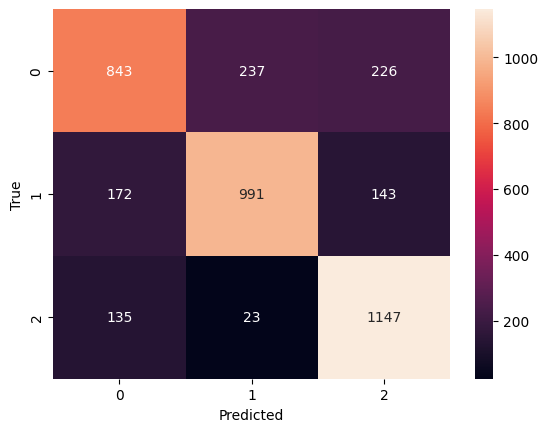

In [15]:
import seaborn as sn
cm=confusion_matrix(y_valid, y_Pred)
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")                                     
plt.ylabel("True")
plt.savefig('../results/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier(random_state =3, eval_loss ="mlogloss",)
# xgb.fit(X_train_scaled, y_train)
# y_pred_xgb = xgb.predict(X_valid_scaled)
# print(classification_report(y_valid,y_pred_xgb ))
# xgb.score(X_valid_scaled, y_valid)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb= GradientBoostingClassifier(random_state =3)
# gb.fit(X_train_scaled, y_train)
# y_pred_gb = gb.predict(X_valid_scaled)
# print(classification_report(y_valid,y_pred_gb ))
#gb.score(X_valid_scaled, y_valid)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1306
           1       0.77      0.71      0.74      1305
           2       0.74      0.83      0.78      1306

    accuracy                           0.73      3917
   macro avg       0.73      0.73      0.73      3917
weighted avg       0.73      0.73      0.73      3917



In [69]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train_scaled, y_train)
# svm.score(X_valid_scaled, y_valid)

In [17]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending = False )
importances

Age                         0.11
Interest_Rate               0.08
Credit_Mix_Good             0.07
Delay_from_due_date         0.06
Num_Credit_Inquiries        0.06
Changed_Credit_Limit        0.05
Payment_of_Min_Amount_No    0.05
Num_of_Delayed_Payment      0.05
Total_EMI_per_month         0.05
Monthly_Balance             0.05
Annual_Income               0.04
Credit_Utilization_Ratio    0.04
Amount_invested_monthly     0.04
Monthly_Inhand_Salary       0.04
Num_Credit_Card             0.04
Outstanding_Debt            0.04
Num_of_Loan                 0.04
Num_Bank_Accounts           0.04
Payment_of_Min_Amount_Yes   0.02
Credit_Mix__                0.02
Credit_Mix_Standard         0.01
dtype: float64

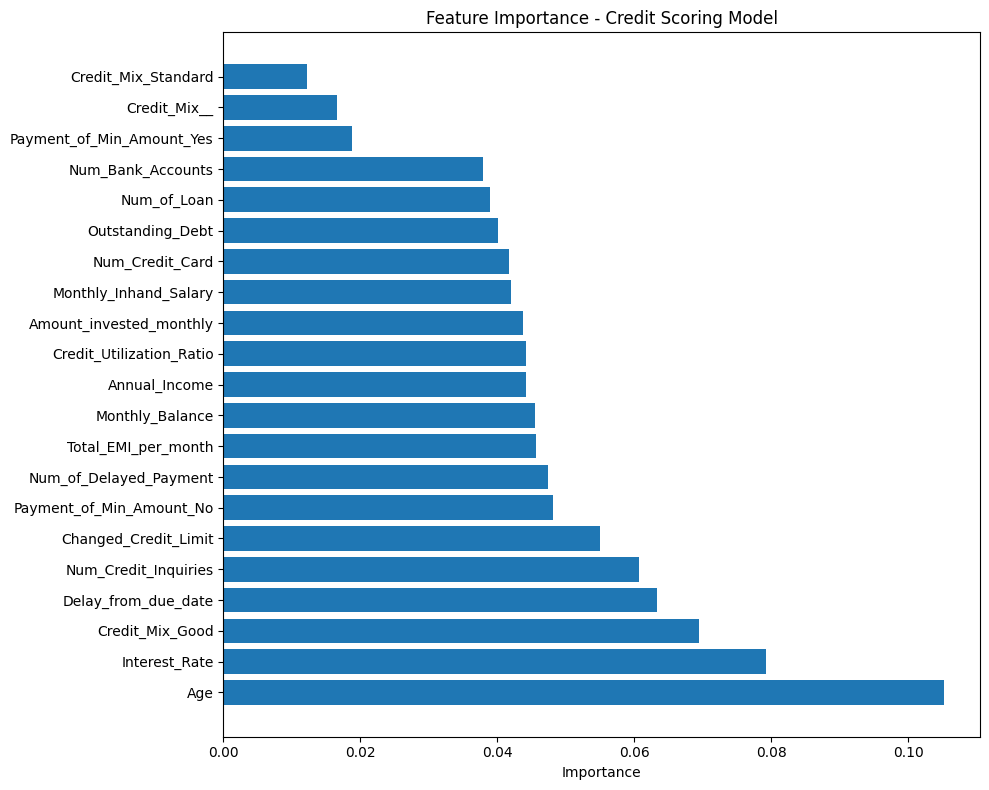

In [18]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances.values)
plt.yticks(range(len(importances)), importances.index)
plt.xlabel('Importance')
plt.title('Feature Importance - Credit Scoring Model')
plt.tight_layout()
plt.savefig('../results/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

